In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
df = pd.read_csv('./data/gurgaon_properties_cleaned_v2.csv').drop_duplicates()
df.head(2)

property_type                  society     sector  price  price_per_sqft  \
0          flat  signature global park 4  sector 36   0.82          7585.0   
1          flat         smart world gems  sector 89   0.95          8600.0   

     area                                       areaWithType  bedRoom  \
0  1081.0  Super Built up area 1081(100.43 sq.m.)Carpet a...        3   
1  1105.0                   Carpet area: 1103 (102.47 sq.m.)        2   

   bathroom balcony  ...  super_built_up_area built_up_area carpet_area  \
0         2       2  ...               1081.0           NaN       650.0   
1         2       2  ...                  NaN           NaN      1103.0   

   study room  servant room  store room  pooja room  others  furnishing_type  \
0           0             0           0           0       0                0   
1           1             1           0           0       0                0   

   luxury_score  
0             8  
1            38  

[2 rows x 23 columns]

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3677 non-null   object 
 1   society              3676 non-null   object 
 2   sector               3677 non-null   object 
 3   price                3660 non-null   float64
 4   price_per_sqft       3660 non-null   float64
 5   area                 3660 non-null   float64
 6   areaWithType         3677 non-null   object 
 7   bedRoom              3677 non-null   int64  
 8   bathroom             3677 non-null   int64  
 9   balcony              3677 non-null   object 
 10  floorNum             3658 non-null   float64
 11  facing               2632 non-null   object 
 12  agePossession        3677 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1690 non-null   float64
 15  carpet_area          1872 non-null   f

property_type vs price

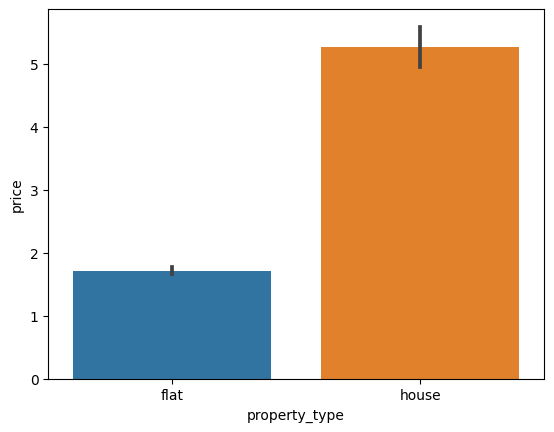

In [111]:
sns.barplot(x=df['property_type'], y=df['price'])
plt.show()

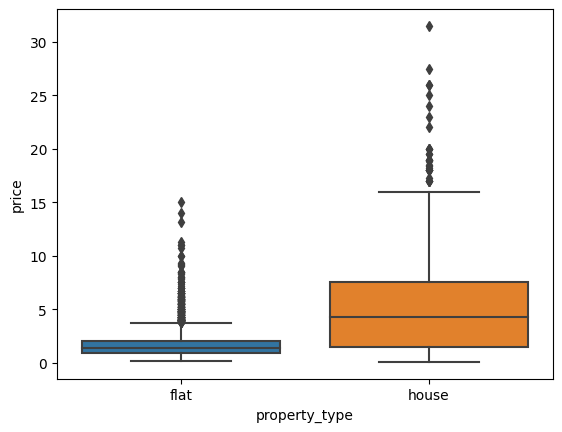

In [112]:
sns.boxplot(x=df['property_type'], y=df['price'])
plt.show()

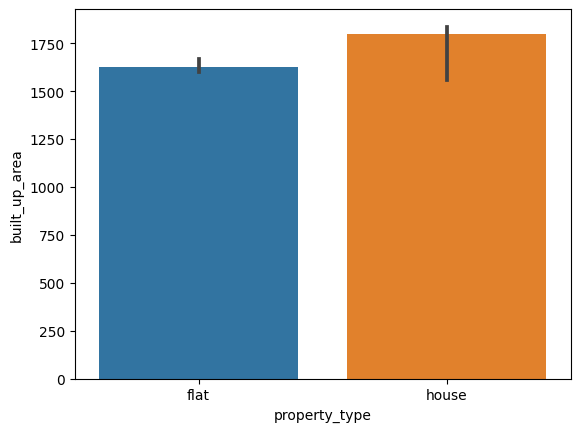

In [113]:
sns.barplot(x=df['property_type'].dropna(), y=df['built_up_area'].dropna(), estimator=np.median)
plt.show()

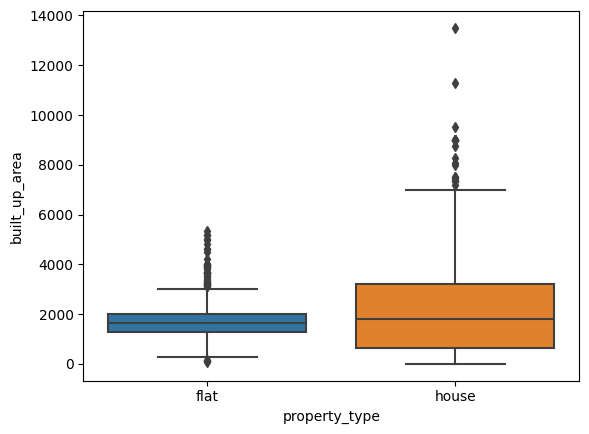

In [114]:
sns.boxplot(x=df['property_type'], y=df[df['built_up_area']!=737147.000000]['built_up_area'])
plt.show()

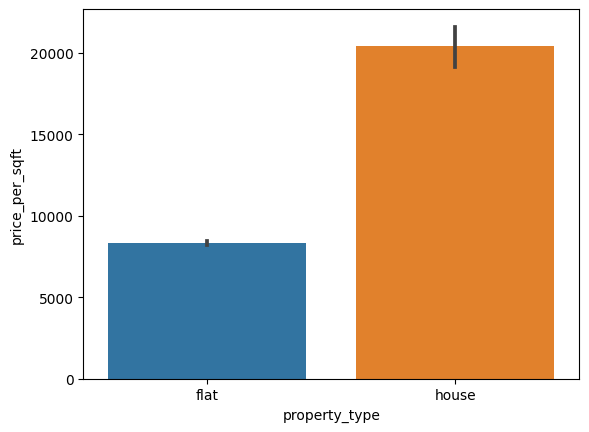

In [115]:
sns.barplot(x=df['property_type'].dropna(), y=df['price_per_sqft'].dropna(), estimator=np.median)
plt.show()

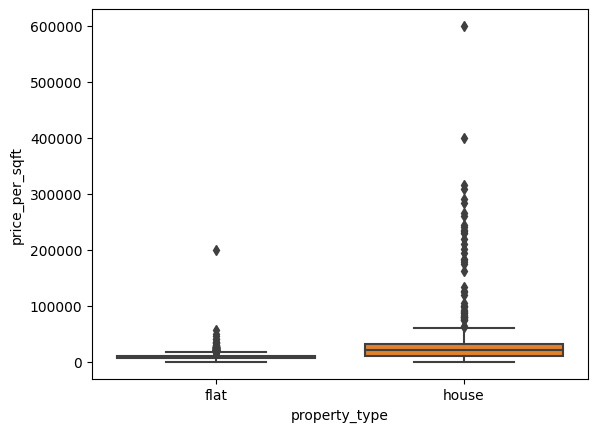

In [116]:
sns.boxplot(x=df['property_type'].dropna(), y=df['price_per_sqft'].dropna())
plt.show()

In [117]:
# check for outliers
# in fact they are data errors
df[df['price_per_sqft'] > 80000].head(5)

property_type                      society     sector  price  \
66          house                  independent  sector 13    0.5   
229         house                    rk excelo  sector 12    0.6   
336         house                  independent  sector 28    4.5   
342         house  unitech nirvana birch court  sector 50    7.1   
545         house                  independent  sector 24   10.0   

     price_per_sqft   area                                       areaWithType  \
66          90909.0   55.0                           Plot area 55(5.11 sq.m.)   
229        120000.0   50.0  Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...   
336        125000.0  360.0                   Built Up area: 360 (33.45 sq.m.)   
342        283333.0  251.0                          Plot area 240(22.3 sq.m.)   
545        229885.0  435.0                     Carpet area: 435 (40.41 sq.m.)   

     bedRoom  bathroom balcony  ...  super_built_up_area built_up_area  \
66        12         4       3  ...                  NaN          55.0   
229        5         3       2  ...                  NaN          30.0   
336        4         4       0  ...                  NaN         360.0   
342        3         3       3  ...                  NaN         240.0   
545        8        10      3+  ...                  NaN           NaN   

    carpet_area  study room  servant room  store room  pooja room  others  \
66          NaN           0             0           0           0       0   
229        15.0           0             0           0           0       1   
336         NaN           0             0           0           0       0   
342         NaN           0             1           0           0       0   
545       435.0           0             0           0           0       0   

     furnishing_type  luxury_score  
66                 0            15  
229                0             0  
336                0             0  
342                0            49  
545                0             0  

[5 rows x 23 columns]

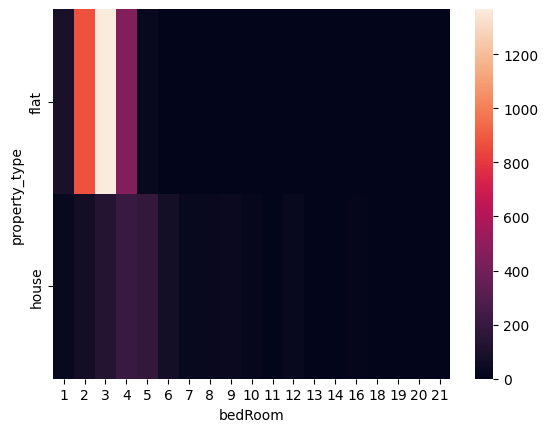

In [118]:
sns.heatmap(pd.crosstab(df['property_type'], df['bedRoom']))
plt.show()

In [119]:
# check for outliers
# in fact they are data errors
df[df['bedRoom'] > 10].head(5)

property_type      society      sector  price  price_per_sqft    area  \
19          house  independent   sector 54   5.50         38194.0  1440.0   
66          house  independent   sector 13   0.50         90909.0    55.0   
78          house  independent  sector 17a   3.87          5160.0  7500.0   
119         house  independent   sector 55   7.49         27741.0  2700.0   
127         house  independent   sector 57   6.95         38611.0  1800.0   

                                          areaWithType  bedRoom  bathroom  \
19                         Plot area 160(133.78 sq.m.)       18        18   
66                            Plot area 55(5.11 sq.m.)       12         4   
78   Plot area 1623(150.78 sq.m.)Built Up area: 750...       19        17   
119                        Plot area 300(250.84 sq.m.)       12        12   
127                        Plot area 192(160.54 sq.m.)       12        12   

    balcony  ...  super_built_up_area built_up_area carpet_area  study room  \
19       3+  ...                  NaN        1440.0         NaN           0   
66        3  ...                  NaN          55.0         NaN           0   
78       3+  ...                  NaN        7500.0         NaN           1   
119      3+  ...                  NaN        2700.0         NaN           1   
127      3+  ...                  NaN        1728.0         NaN           0   

     servant room  store room  pooja room  others  furnishing_type  \
19              1           0           0       0                2   
66              0           0           0       0                0   
78              0           1           0       0                0   
119             1           0           1       0                1   
127             1           1           0       0                1   

     luxury_score  
19             70  
66             15  
78             68  
119            49  
127            73  

[5 rows x 23 columns]

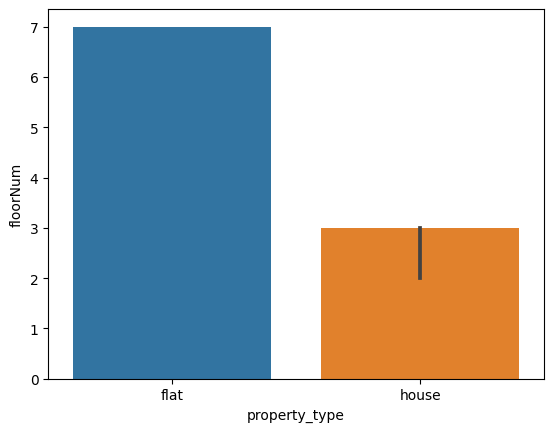

In [120]:
sns.barplot(x=df['property_type'].dropna(), y=df['floorNum'].dropna(), estimator=np.median)
plt.show()

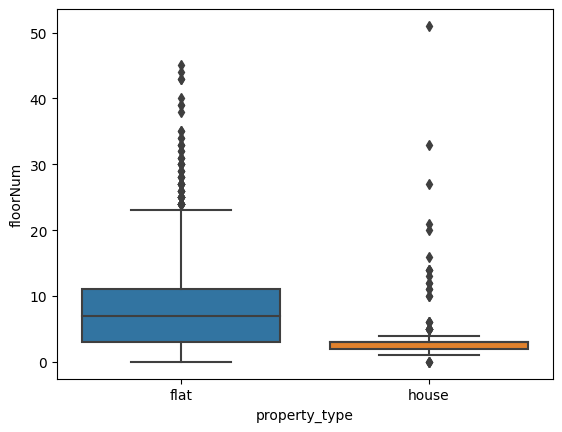

In [121]:
sns.boxplot(x=df['property_type'].dropna(), y=df['floorNum'].dropna())
plt.show()

In [122]:
# check for outliers in the houses
df[(df['property_type'] == 'house') & (df['floorNum'] > 5)] 
# Conclusion : Houses are villas in apartments complex. Generally PentHouse

property_type                  society      sector  price  \
35           house              greenopolis   sector 89   0.70   
106          house        suncity avenue 76   sector 76   0.75   
267          house               ninex city   sector 76   1.75   
338          house              spaze privy   sector 72   3.09   
420          house              spaze privy   sector 72   3.10   
1107         house            tata primanti   sector 72   8.50   
1297         house  indiabulls centrum park  sector 103   3.25   
1594         house              independent   sector 43   2.20   
2147         house      ireo victory valley   sector 67   8.00   
2167         house         suncity township   sector 54   2.00   
2556         house           dlf the arbour   sector 63   8.50   
2796         house              independent   sector 92   1.80   
2833         house              independent   sector 24   3.20   
2887         house              independent  sector 103   2.25   
2969         house      satya the hermitage  sector 103   3.15   
2973         house          godrej meridien  sector 106   5.60   
3224         house   vatika the seven lamps   sector 82   1.60   
3557         house    vatika sovereign next  sector 82a   3.85   
3668         house           ats tourmaline  sector 109   1.87   

      price_per_sqft    area  \
35            5397.0  1297.0   
106          10067.0   745.0   
267           6250.0  2800.0   
338           6981.0  4426.0   
420           8486.0  3653.0   
1107         13492.0  6300.0   
1297          8125.0  4000.0   
1594          6875.0  3200.0   
2147         22222.0  3600.0   
2167         30968.0   646.0   
2556         21519.0  3950.0   
2796          7627.0  2360.0   
2833         59259.0   540.0   
2887          6367.0  3534.0   
2969          6702.0  4700.0   
2973         14000.0  4000.0   
3224          6597.0  2425.0   
3557          7500.0  5133.0   
3668          8697.0  2150.0   

                                           areaWithType  bedRoom  bathroom  \
35                    Built Up area: 1297 (120.5 sq.m.)        2         2   
106   Plot area 745(69.21 sq.m.)Built Up area: 745 s...        2         2   
267                    Carpet area: 2800 (260.13 sq.m.)        4         4   
338   Built Up area: 3653 (339.37 sq.m.)Carpet area:...        5         5   
420                        Plot area 3653(339.37 sq.m.)        5         5   
1107                       Plot area 6300(585.29 sq.m.)        5         6   
1297                       Plot area 4000(371.61 sq.m.)        4         3   
1594                       Plot area 3200(297.29 sq.m.)       12        12   
2147                        Plot area 400(334.45 sq.m.)        6         7   
2167  Plot area 60Built Up area: 60 sq.m.Carpet area...        9         9   
2556                 Built Up area: 3950 (366.97 sq.m.)        4         4   
2796                 Built Up area: 2360 (219.25 sq.m.)        4         5   
2833                          Plot area 60(50.17 sq.m.)       14        14   
2887  Built Up area: 3534 (328.32 sq.m.)Carpet area:...        3         5   
2969                 Built Up area: 4700 (436.64 sq.m.)        4         5   
2973                       Plot area 4000(371.61 sq.m.)        5         4   
3224                       Plot area 2425(225.29 sq.m.)        4         4   
3557                 Built Up area: 5140 (477.52 sq.m.)        5         6   
3668                 Built Up area: 2150 (199.74 sq.m.)        3         4   

     balcony  ...  super_built_up_area built_up_area carpet_area  study room  \
35         2  ...                  NaN        1297.0         NaN           0   
106        2  ...                  NaN         745.0         NaN           0   
267        0  ...                  NaN           NaN      2800.0           0   
338       3+  ...                  NaN        3653.0      2922.0           0   
420       3+  ...                  NaN        3653.0         NaN           0   
11

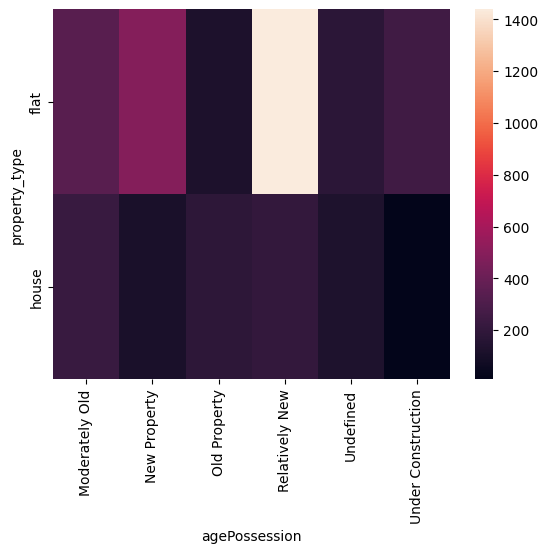

In [123]:
# property_type and agePossession
sns.heatmap(pd.crosstab(df['property_type'], df['agePossession']))
plt.show()

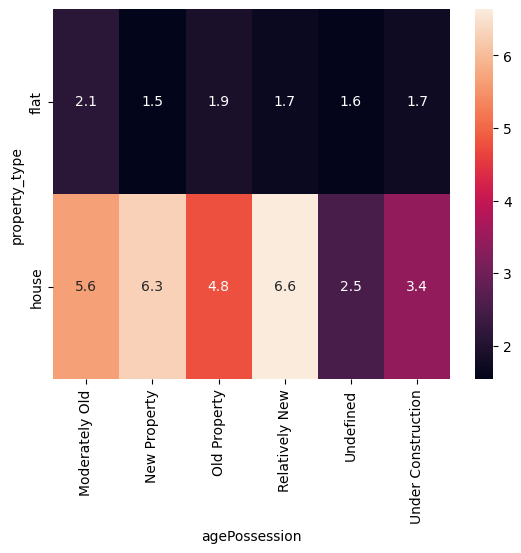

In [124]:
sns.heatmap(pd.pivot_table(df, index='property_type', columns='agePossession', values='price', aggfunc='mean'), annot=True)
plt.show()

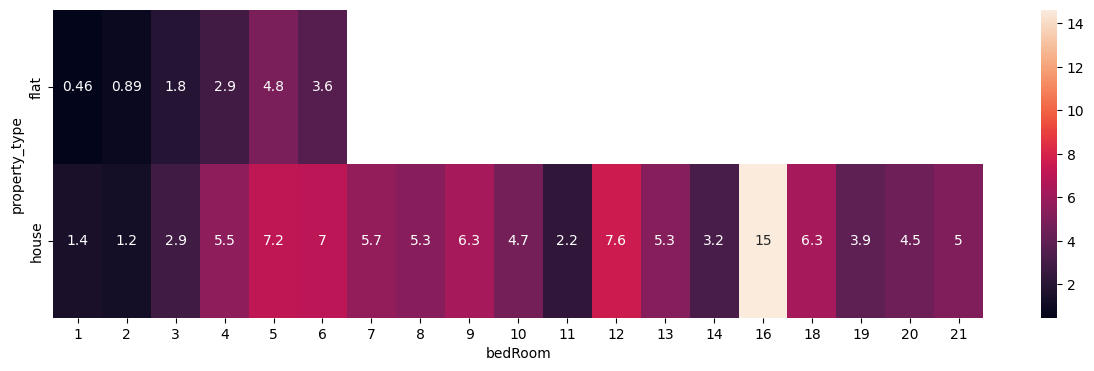

In [125]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df, index='property_type', columns='bedRoom', values='price', aggfunc='mean'), annot=True)
plt.show()

Property Type vs Furnishing Type

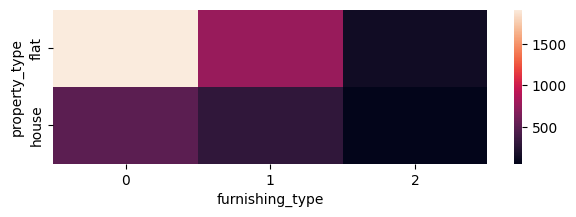

In [126]:
plt.figure(figsize=(7,2))
sns.heatmap(pd.crosstab(df['property_type'], df['furnishing_type']))
plt.show()

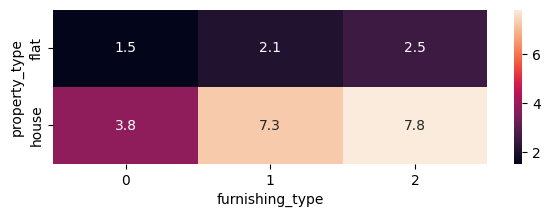

In [127]:
plt.figure(figsize=(7,2))
sns.heatmap(pd.pivot_table(df, index='property_type', columns='furnishing_type', values='price', aggfunc='mean'), annot=True)
plt.show()

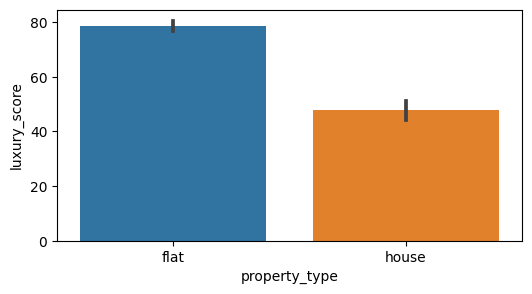

In [128]:
# propert_type vs Luxury_score
plt.figure(figsize=(6,3))
sns.barplot(x=df['property_type'], y=df['luxury_score'])
plt.show()

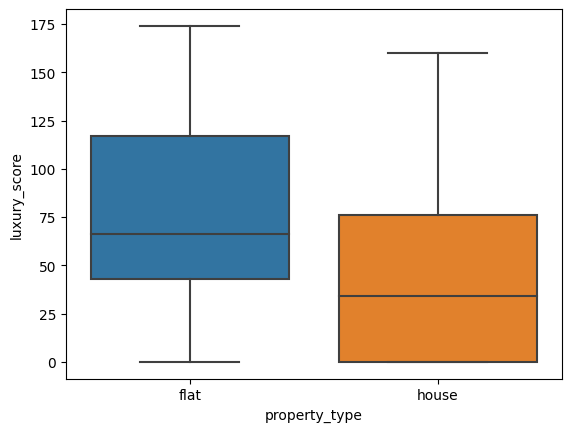

In [129]:
# propert_type vs Luxury_score
#plt.figure(figsize=(6,3))
sns.boxplot(x=df['property_type'], y=df['luxury_score'])
plt.show()

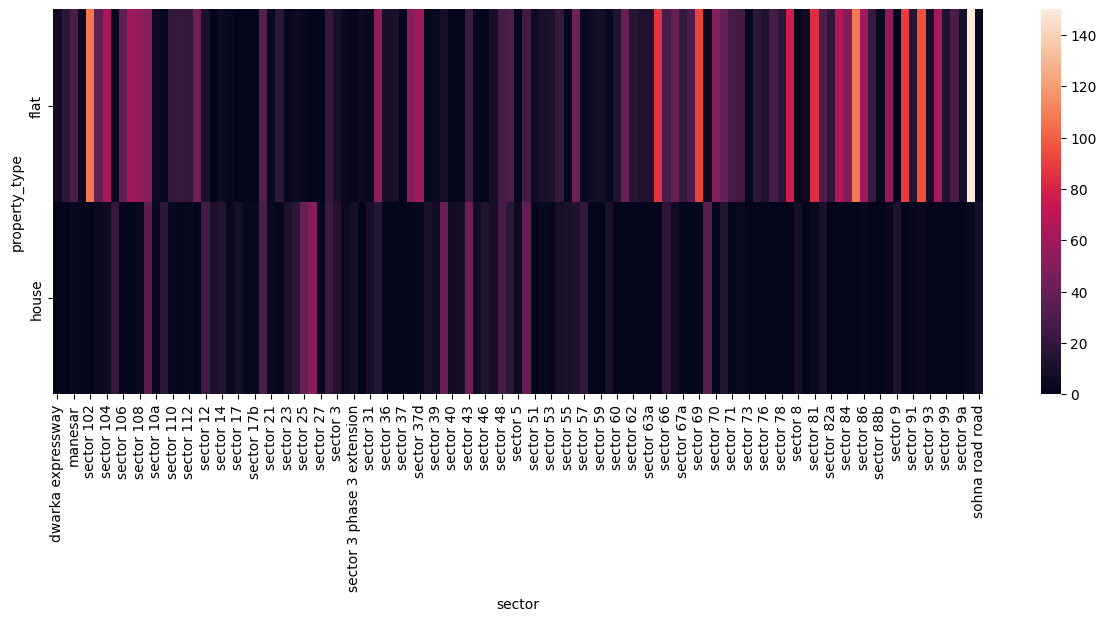

In [130]:
# property_type vs sector distribution
plt.figure(figsize=(15,5))
# sns.heatmap(pd.pivot_table(df, index='property_type', columns='sector', values='price', aggfunc='count' ), annot=True)
sns.heatmap(pd.crosstab(df['property_type'], df['sector']).sort_index())
plt.show()

In [131]:
# number of properties available in a sector, segregated by property type
pd.pivot_table(df, index='property_type', columns='sector', values='price', aggfunc='count').sort_index()

sector         dwarka expressway  gwal pahari  manesar  sector 1  sector 102  \
property_type                                                                  
flat                         7.0         18.0     30.0       4.0       107.0   
house                        1.0          NaN      3.0       2.0         NaN   

sector         sector 103  sector 104  sector 105  sector 106  sector 107  \
property_type                                                               
flat                 38.0        63.0         3.0        37.0        60.0   
house                 4.0         6.0        20.0         1.0         NaN   

sector         ...  sector 90  sector 91  sector 92  sector 93  sector 95  \
property_type  ...                                                          
flat           ...       89.0       15.0       96.0        8.0       62.0   
house          ...        NaN        2.0        4.0        1.0        NaN   

sector         sector 99  sector 99a  sector 9a  sohna road  sohna road road  
property_type                                                                 
flat                12.0        30.0        9.0       150.0              3.0  
house                NaN         NaN        1.0         4.0              9.0  

[2 rows x 113 columns]

In [132]:
# based on average (mean) price in the sector
pt = pd.pivot_table(df, index='property_type', columns='sector', values='price', aggfunc='mean').transpose()

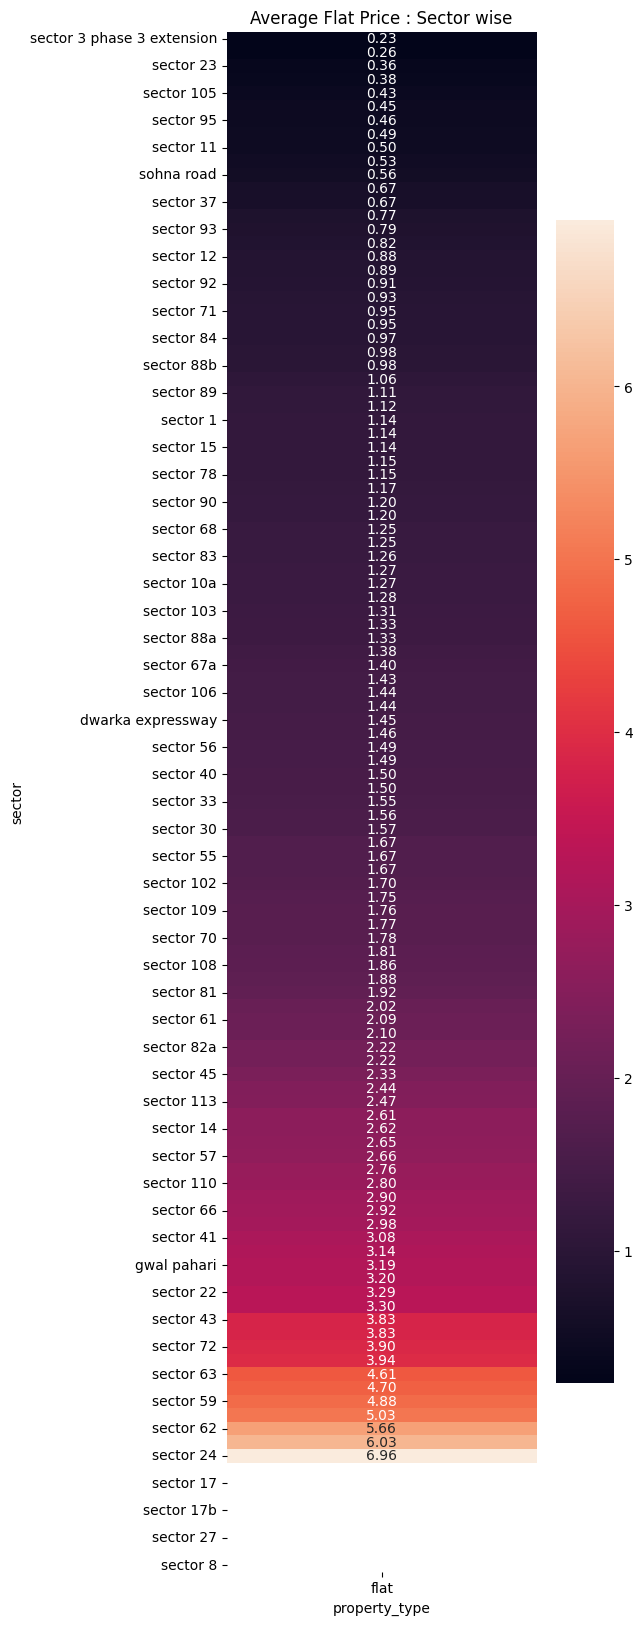

In [133]:
plt.figure(figsize=(5,20))
sns.heatmap(pt.iloc[:,0:1].sort_values(by='flat'), annot=True, fmt='0.2f')
plt.title('Average Flat Price : Sector wise')
plt.show()

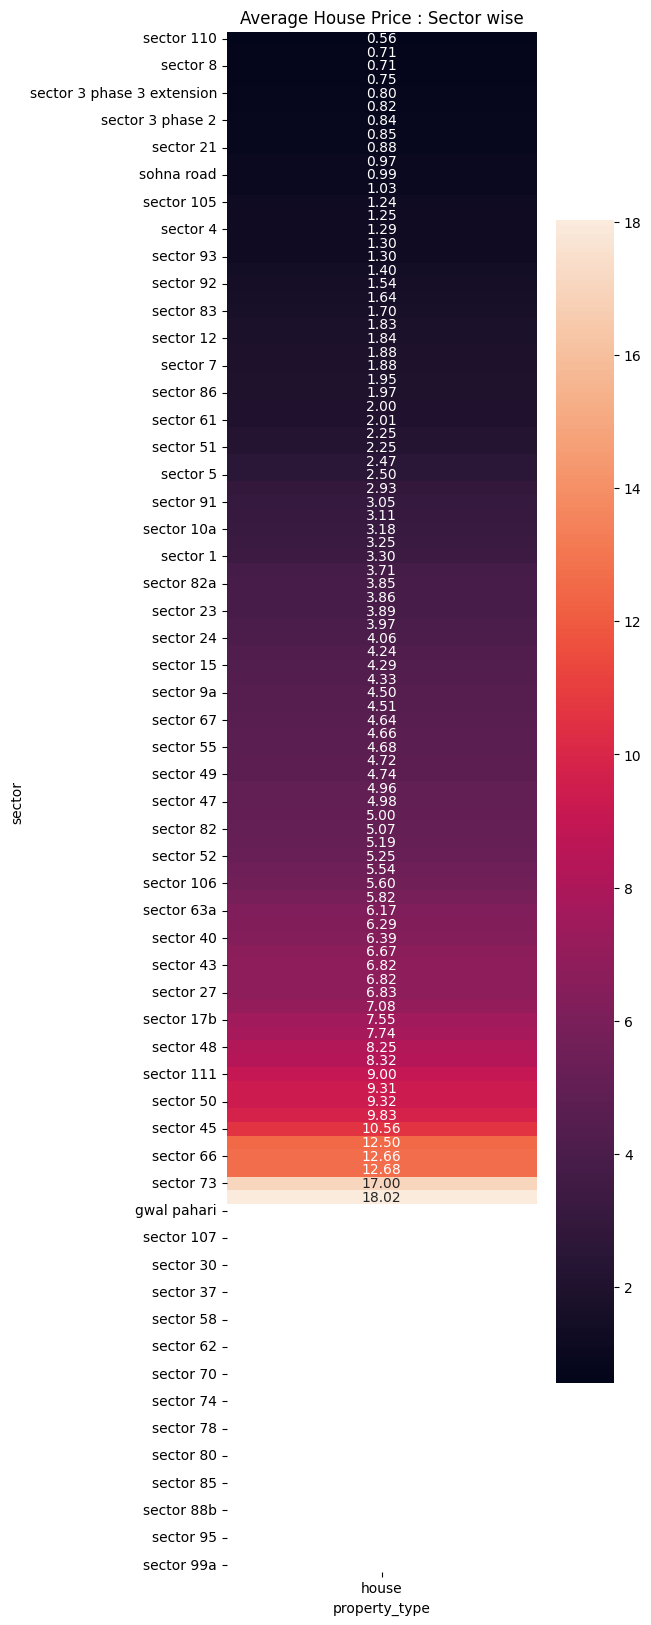

In [134]:
plt.figure(figsize=(5,20))
sns.heatmap(pt.iloc[:,1:].sort_values(by='house'), annot=True, fmt='0.2f')
plt.title('Average House Price : Sector wise')
plt.show()

In [135]:
# based on average (mean) price in the sector
pt = pd.pivot_table(df, index='property_type', columns='sector', values='price_per_sqft', aggfunc='mean').transpose()

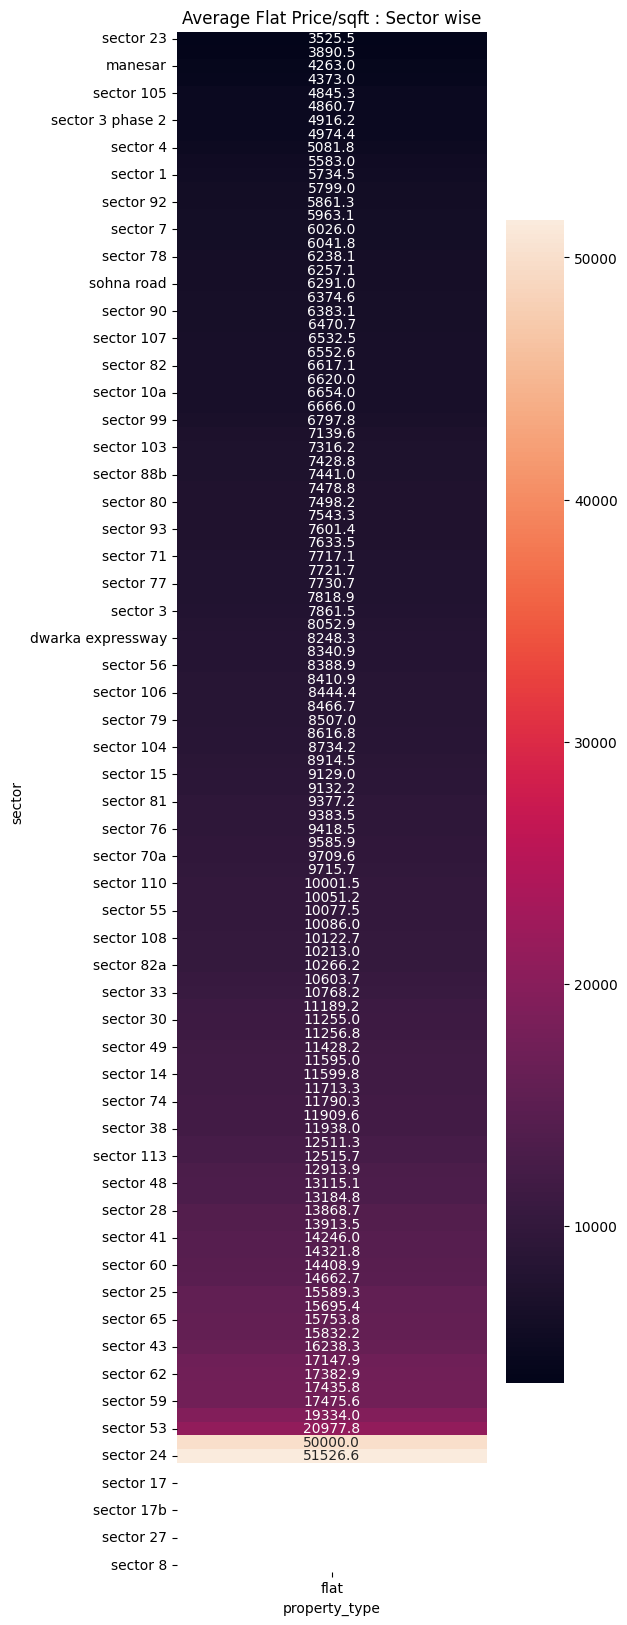

In [136]:
plt.figure(figsize=(5,20))
sns.heatmap(pt.iloc[:,0:1].sort_values(by='flat'), annot=True, fmt='0.1f')
plt.title('Average Flat Price/sqft : Sector wise')
plt.show()

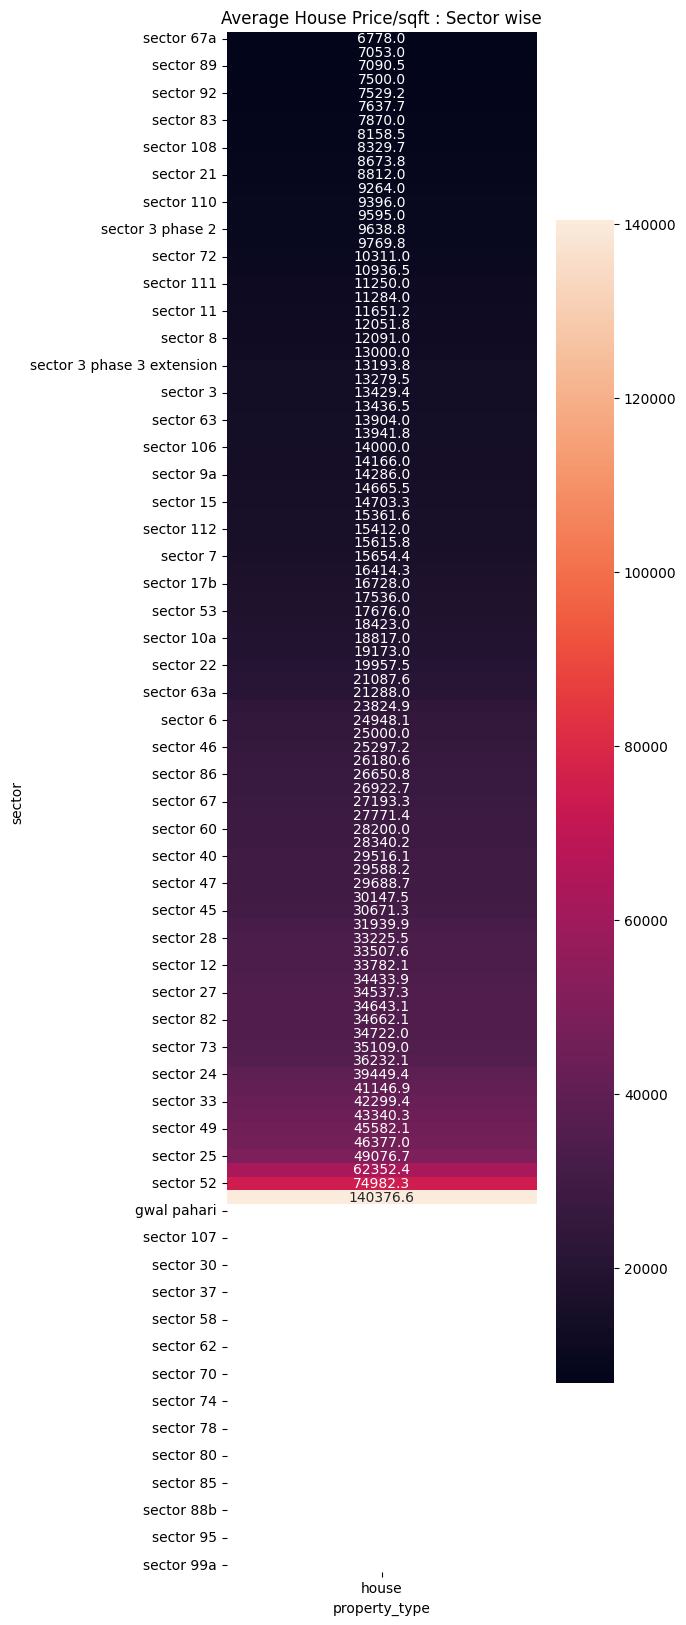

In [137]:
plt.figure(figsize=(5,20))
sns.heatmap(pt.iloc[:,1:].sort_values(by='house'), annot=True, fmt='0.1f')
plt.title('Average House Price/sqft : Sector wise')
plt.show()

In [138]:
# based on average (mean) luxury score in the sector
pt = pd.pivot_table(df, index='property_type', columns='sector', values='luxury_score', aggfunc='mean').transpose()

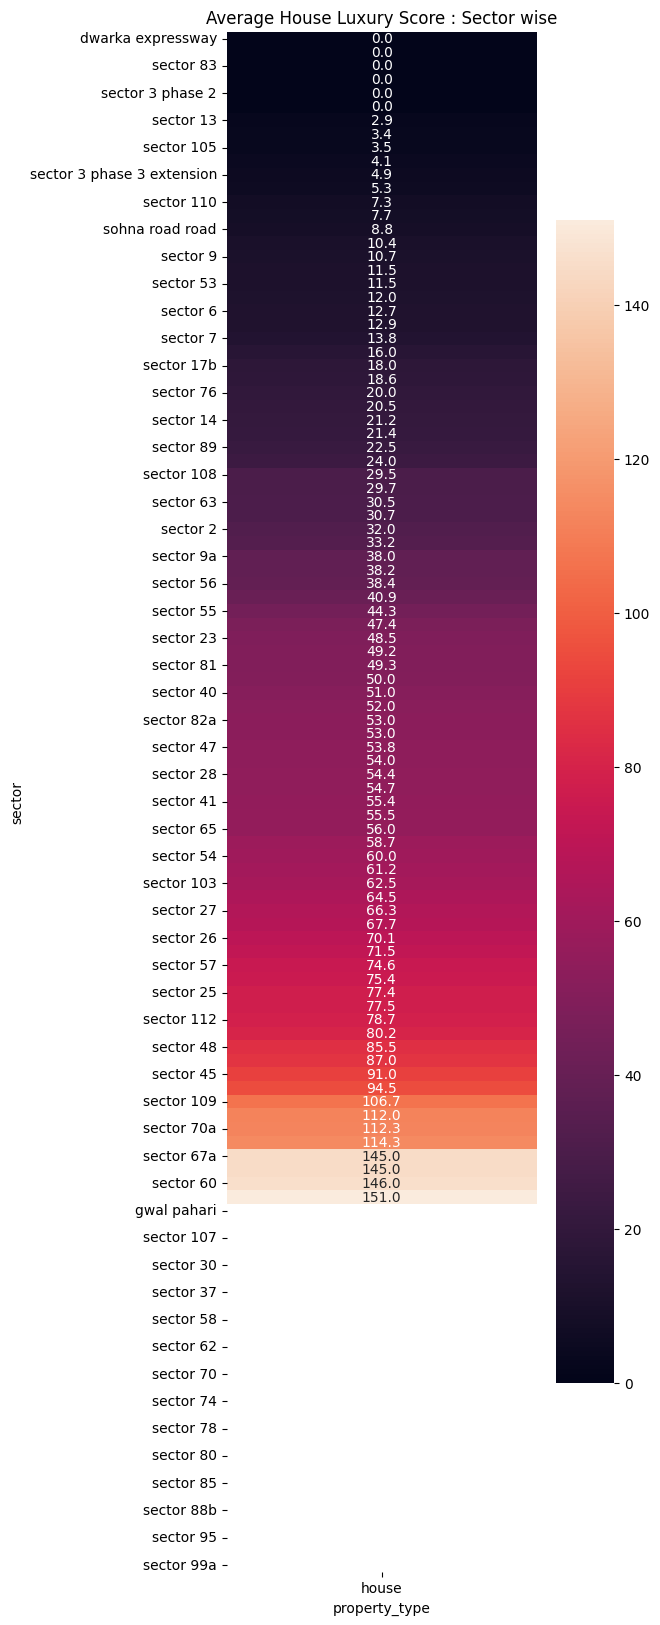

In [139]:
plt.figure(figsize=(5,20))
sns.heatmap(pt.iloc[:,1:].sort_values(by='house'), annot=True, fmt='0.1f')
plt.title('Average House Luxury Score : Sector wise')
plt.show()

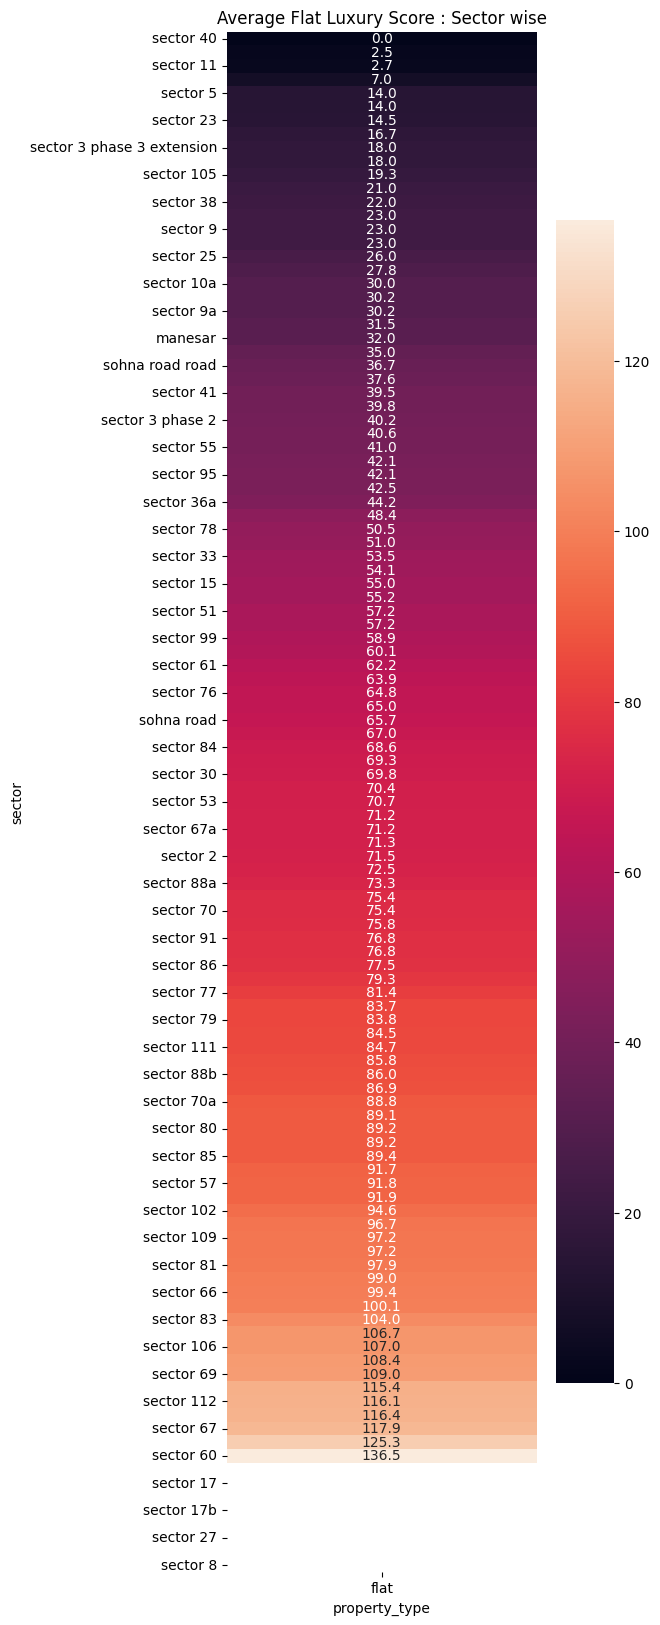

In [140]:
plt.figure(figsize=(5,20))
sns.heatmap(pt.iloc[:,0:1].sort_values(by='flat'), annot=True, fmt='0.1f')
plt.title('Average Flat Luxury Score : Sector wise')
plt.show()

Price Analysis

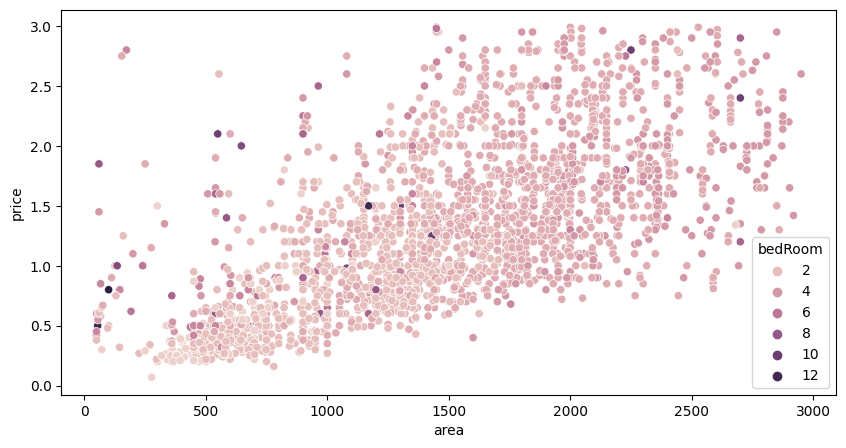

In [141]:
df2 = df[(df['area'] < 3000)&(df['price'] < 3)]
#df2.loc[:,['area', 'price']].head()
plt.figure(figsize=(10,5))
sns.scatterplot(x=df2['area'], y=df2['price'], hue=df2['bedRoom'])
plt.show()

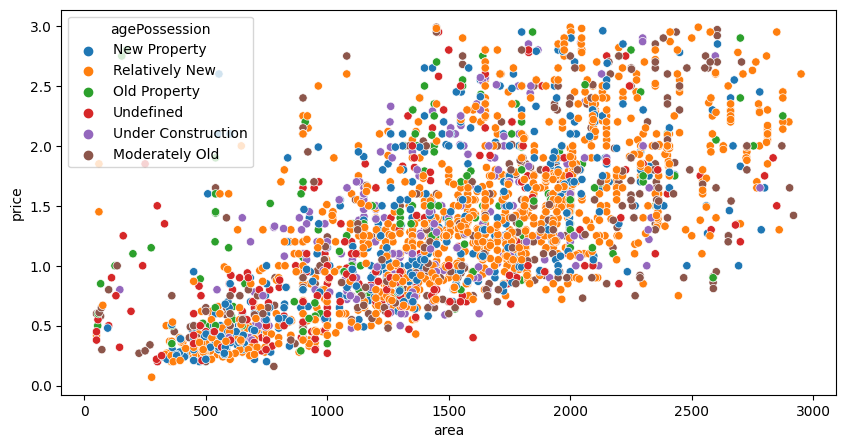

In [142]:
df2 = df[(df['area'] < 3000)&(df['price'] < 3)]
plt.figure(figsize=(10,5))
sns.scatterplot(x=df2['area'], y=df2['price'], hue=df2['agePossession'])
plt.show()

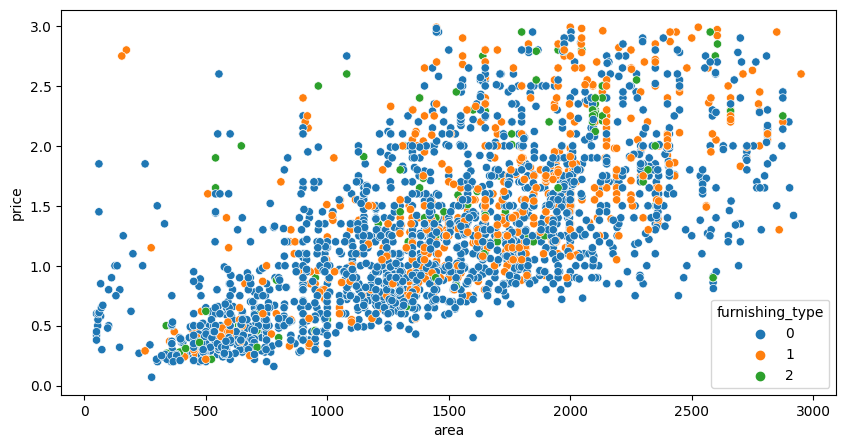

In [143]:
df2 = df[(df['area'] < 3000)&(df['price'] < 3)]
plt.figure(figsize=(10,5))
sns.scatterplot(x=df2['area'], y=df2['price'], hue=df2['furnishing_type'].astype('category'))
plt.show()

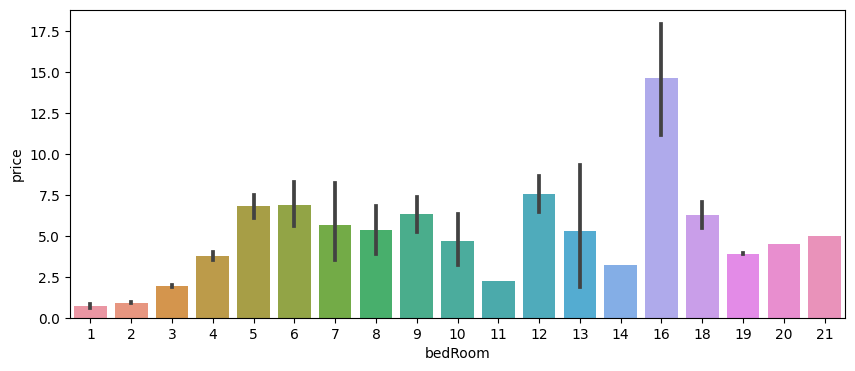

In [144]:
# bedRoom vs Price
plt.figure(figsize=(10,4))
# default estimator is mean
# can not use median due to null values
sns.barplot(x=df['bedRoom'], y=df['price']) 
plt.show()

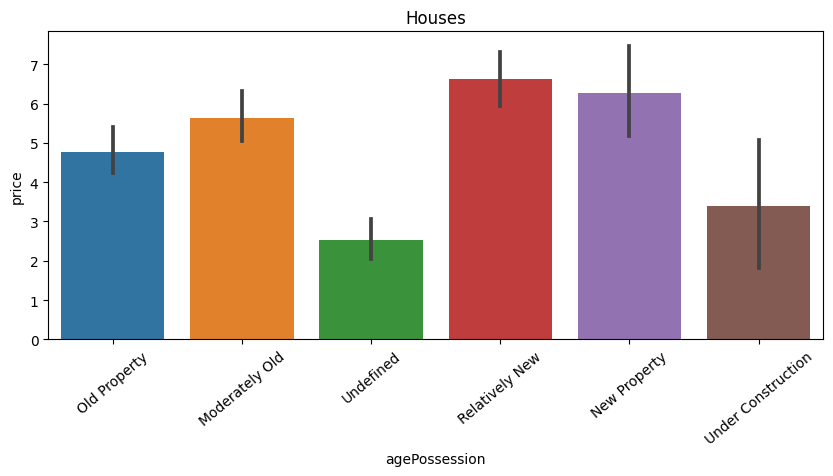

In [145]:
# bedRoom vs Price
plt.figure(figsize=(10,4))
df2 = df[df['property_type'] == 'house']
sns.barplot(x=df2['agePossession'], y=df2['price']) 
plt.xticks(rotation=40)
plt.title('Houses')
plt.show()

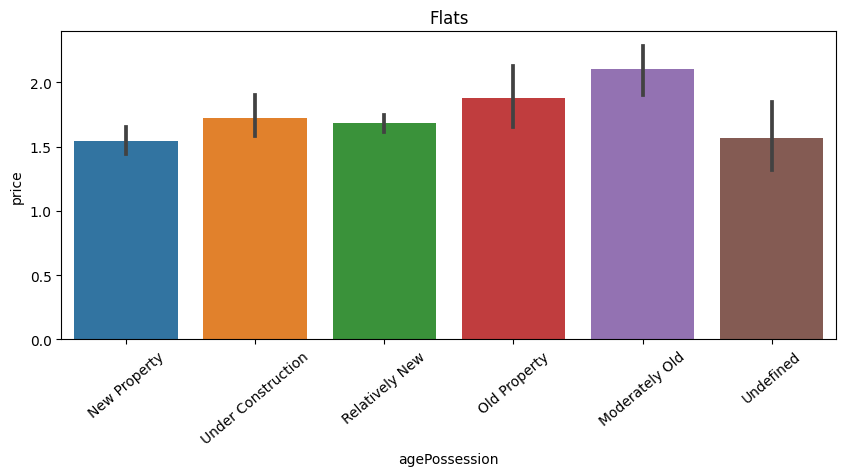

In [146]:
# bedRoom vs Price
plt.figure(figsize=(10,4))
df2 = df[df['property_type'] == 'flat']
sns.barplot(x=df2['agePossession'], y=df2['price']) 
plt.title('Flats')
plt.xticks(rotation=40)
plt.show()

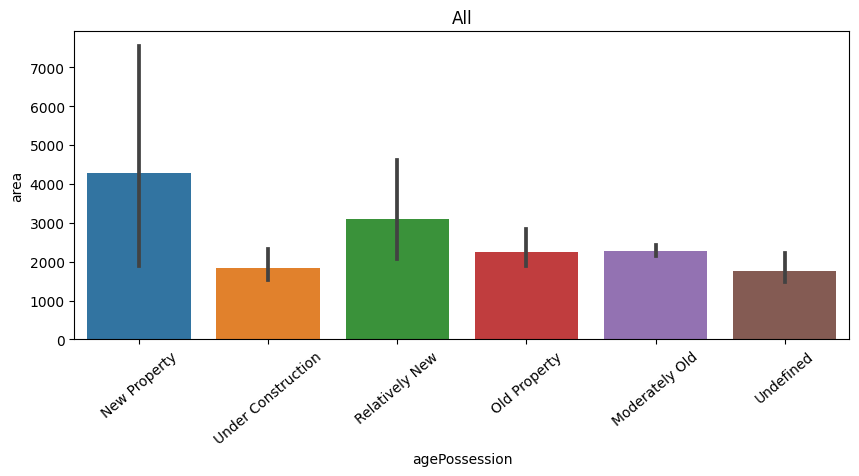

In [147]:
# bedRoom vs Price
plt.figure(figsize=(10,4))
sns.barplot(x=df['agePossession'], y=df['area']) 
plt.xticks(rotation=40)
plt.title('All')
plt.show()

/Users/vivektyagi/miniconda3/envs/envDS/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


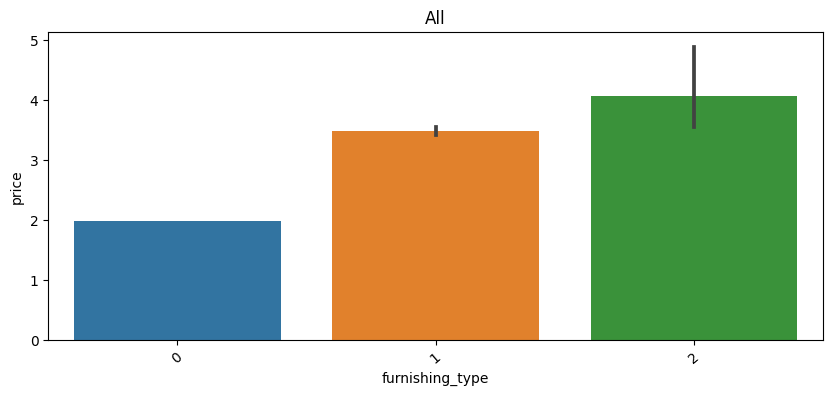

In [148]:
# bedRoom vs Price
plt.figure(figsize=(10,4))
sns.barplot(x=df['furnishing_type'].astype('category'), y=df['price'], estimator=np.mean) 
plt.xticks(rotation=40)
plt.title('All')
plt.show()

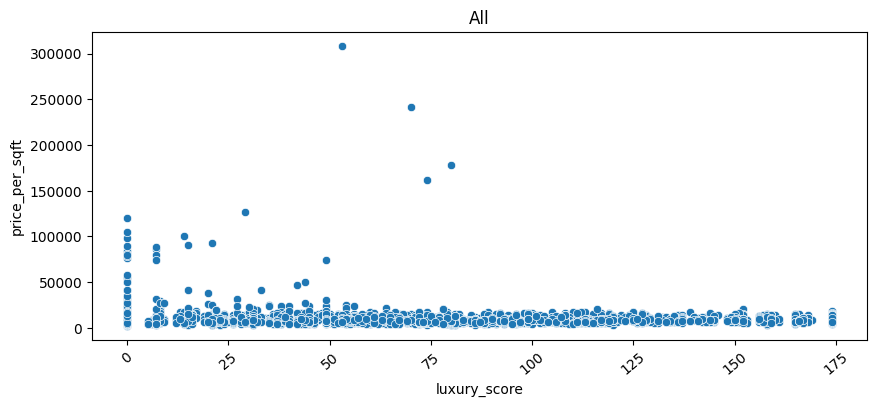

In [149]:
# luxury score vs price per sqft
df2 = df[(df['area'] < 3000)&(df['price'] < 3.0)]

plt.figure(figsize=(10,4))
sns.scatterplot(x=df2['luxury_score'], y=df2['price_per_sqft']) 
# sns.scatterplot(x=df['luxury_score'], y=df['price']) 
plt.xticks(rotation=40)
plt.title('All')
plt.show()

# Observation: Seems no rrelationship Uhh...!

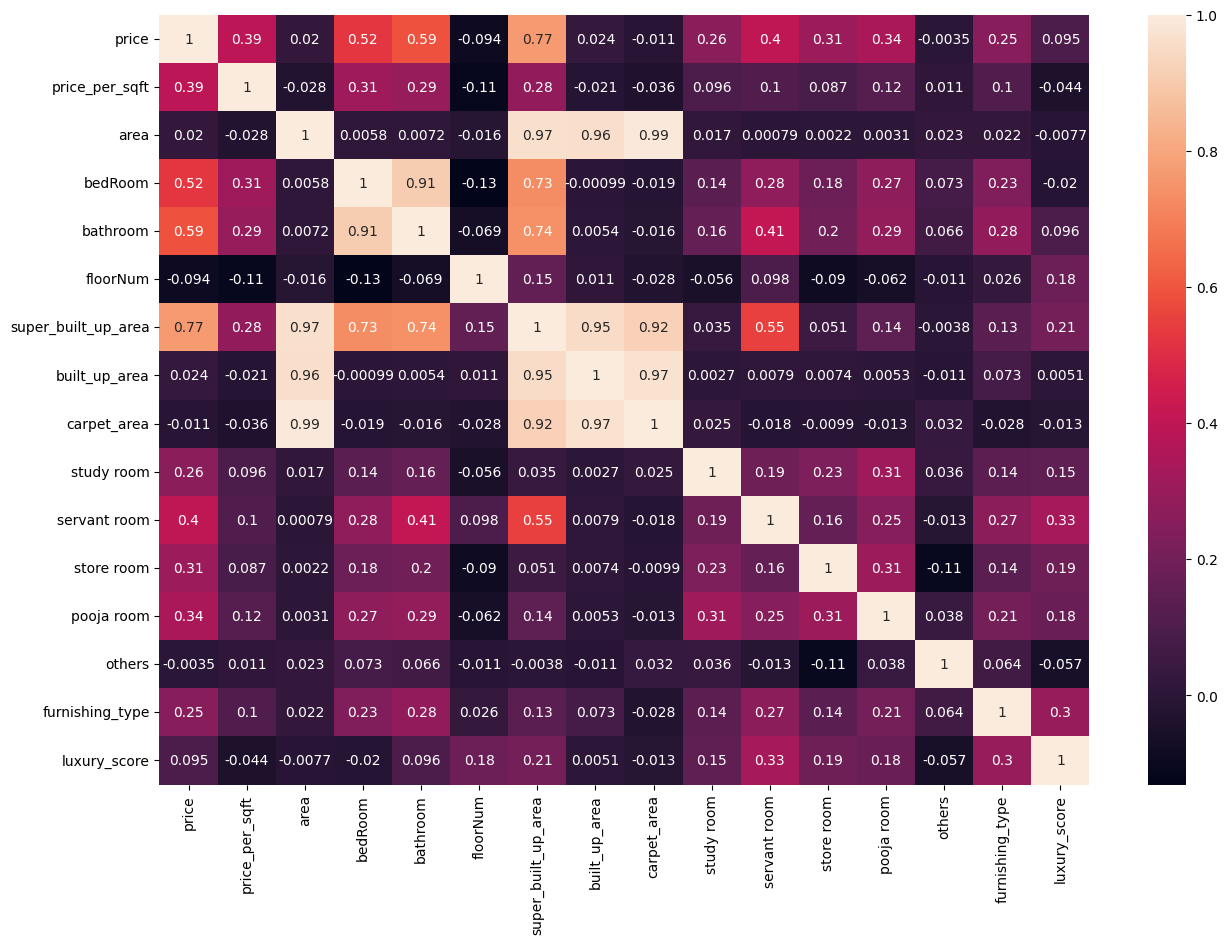

In [150]:
# correlation map between all numerical columns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

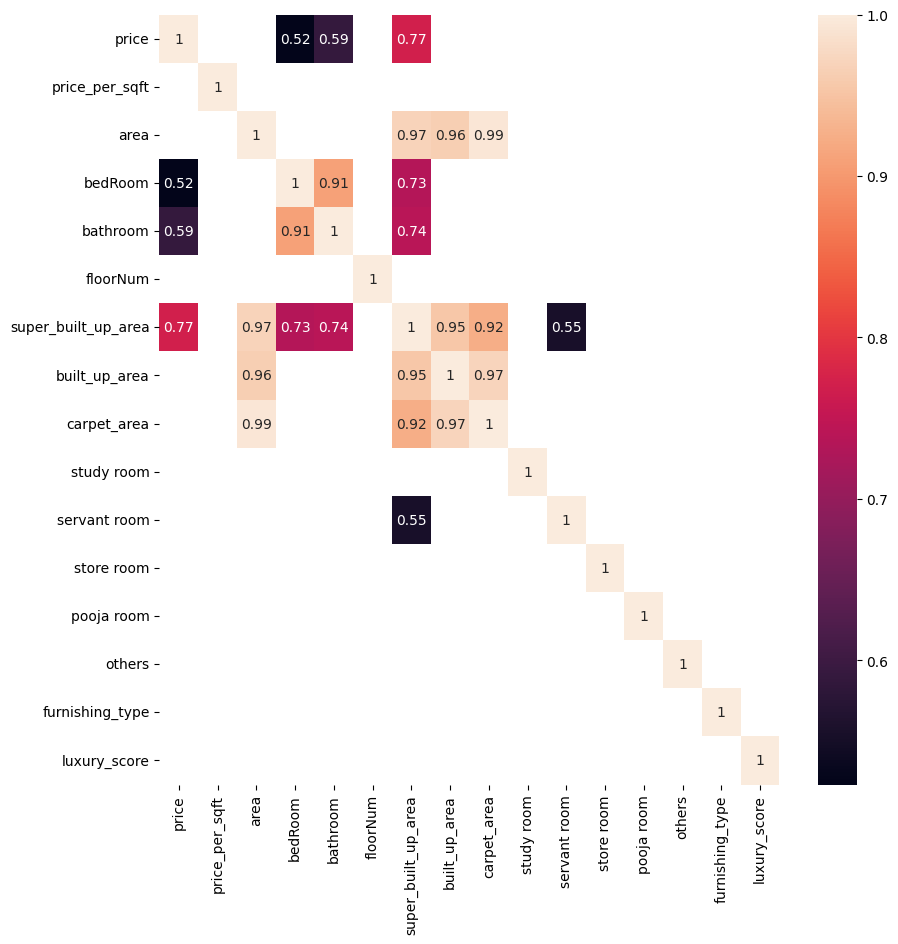

In [151]:
# not getting any meaningful  new insight from correlatons
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr[np.abs(corr) > 0.50], annot=True)
plt.show()

In [154]:
# on which columns price is dependent
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price                  1.000000
super_built_up_area    0.769412
bathroom               0.589886
bedRoom                0.522993
servant room           0.401017
price_per_sqft         0.391323
pooja room             0.341550
store room             0.309158
study room             0.258672
furnishing_type        0.254022
luxury_score           0.094869
built_up_area          0.024103
area                   0.019634
others                -0.003455
carpet_area           -0.011344
floorNum              -0.094322
Name: price, dtype: float64

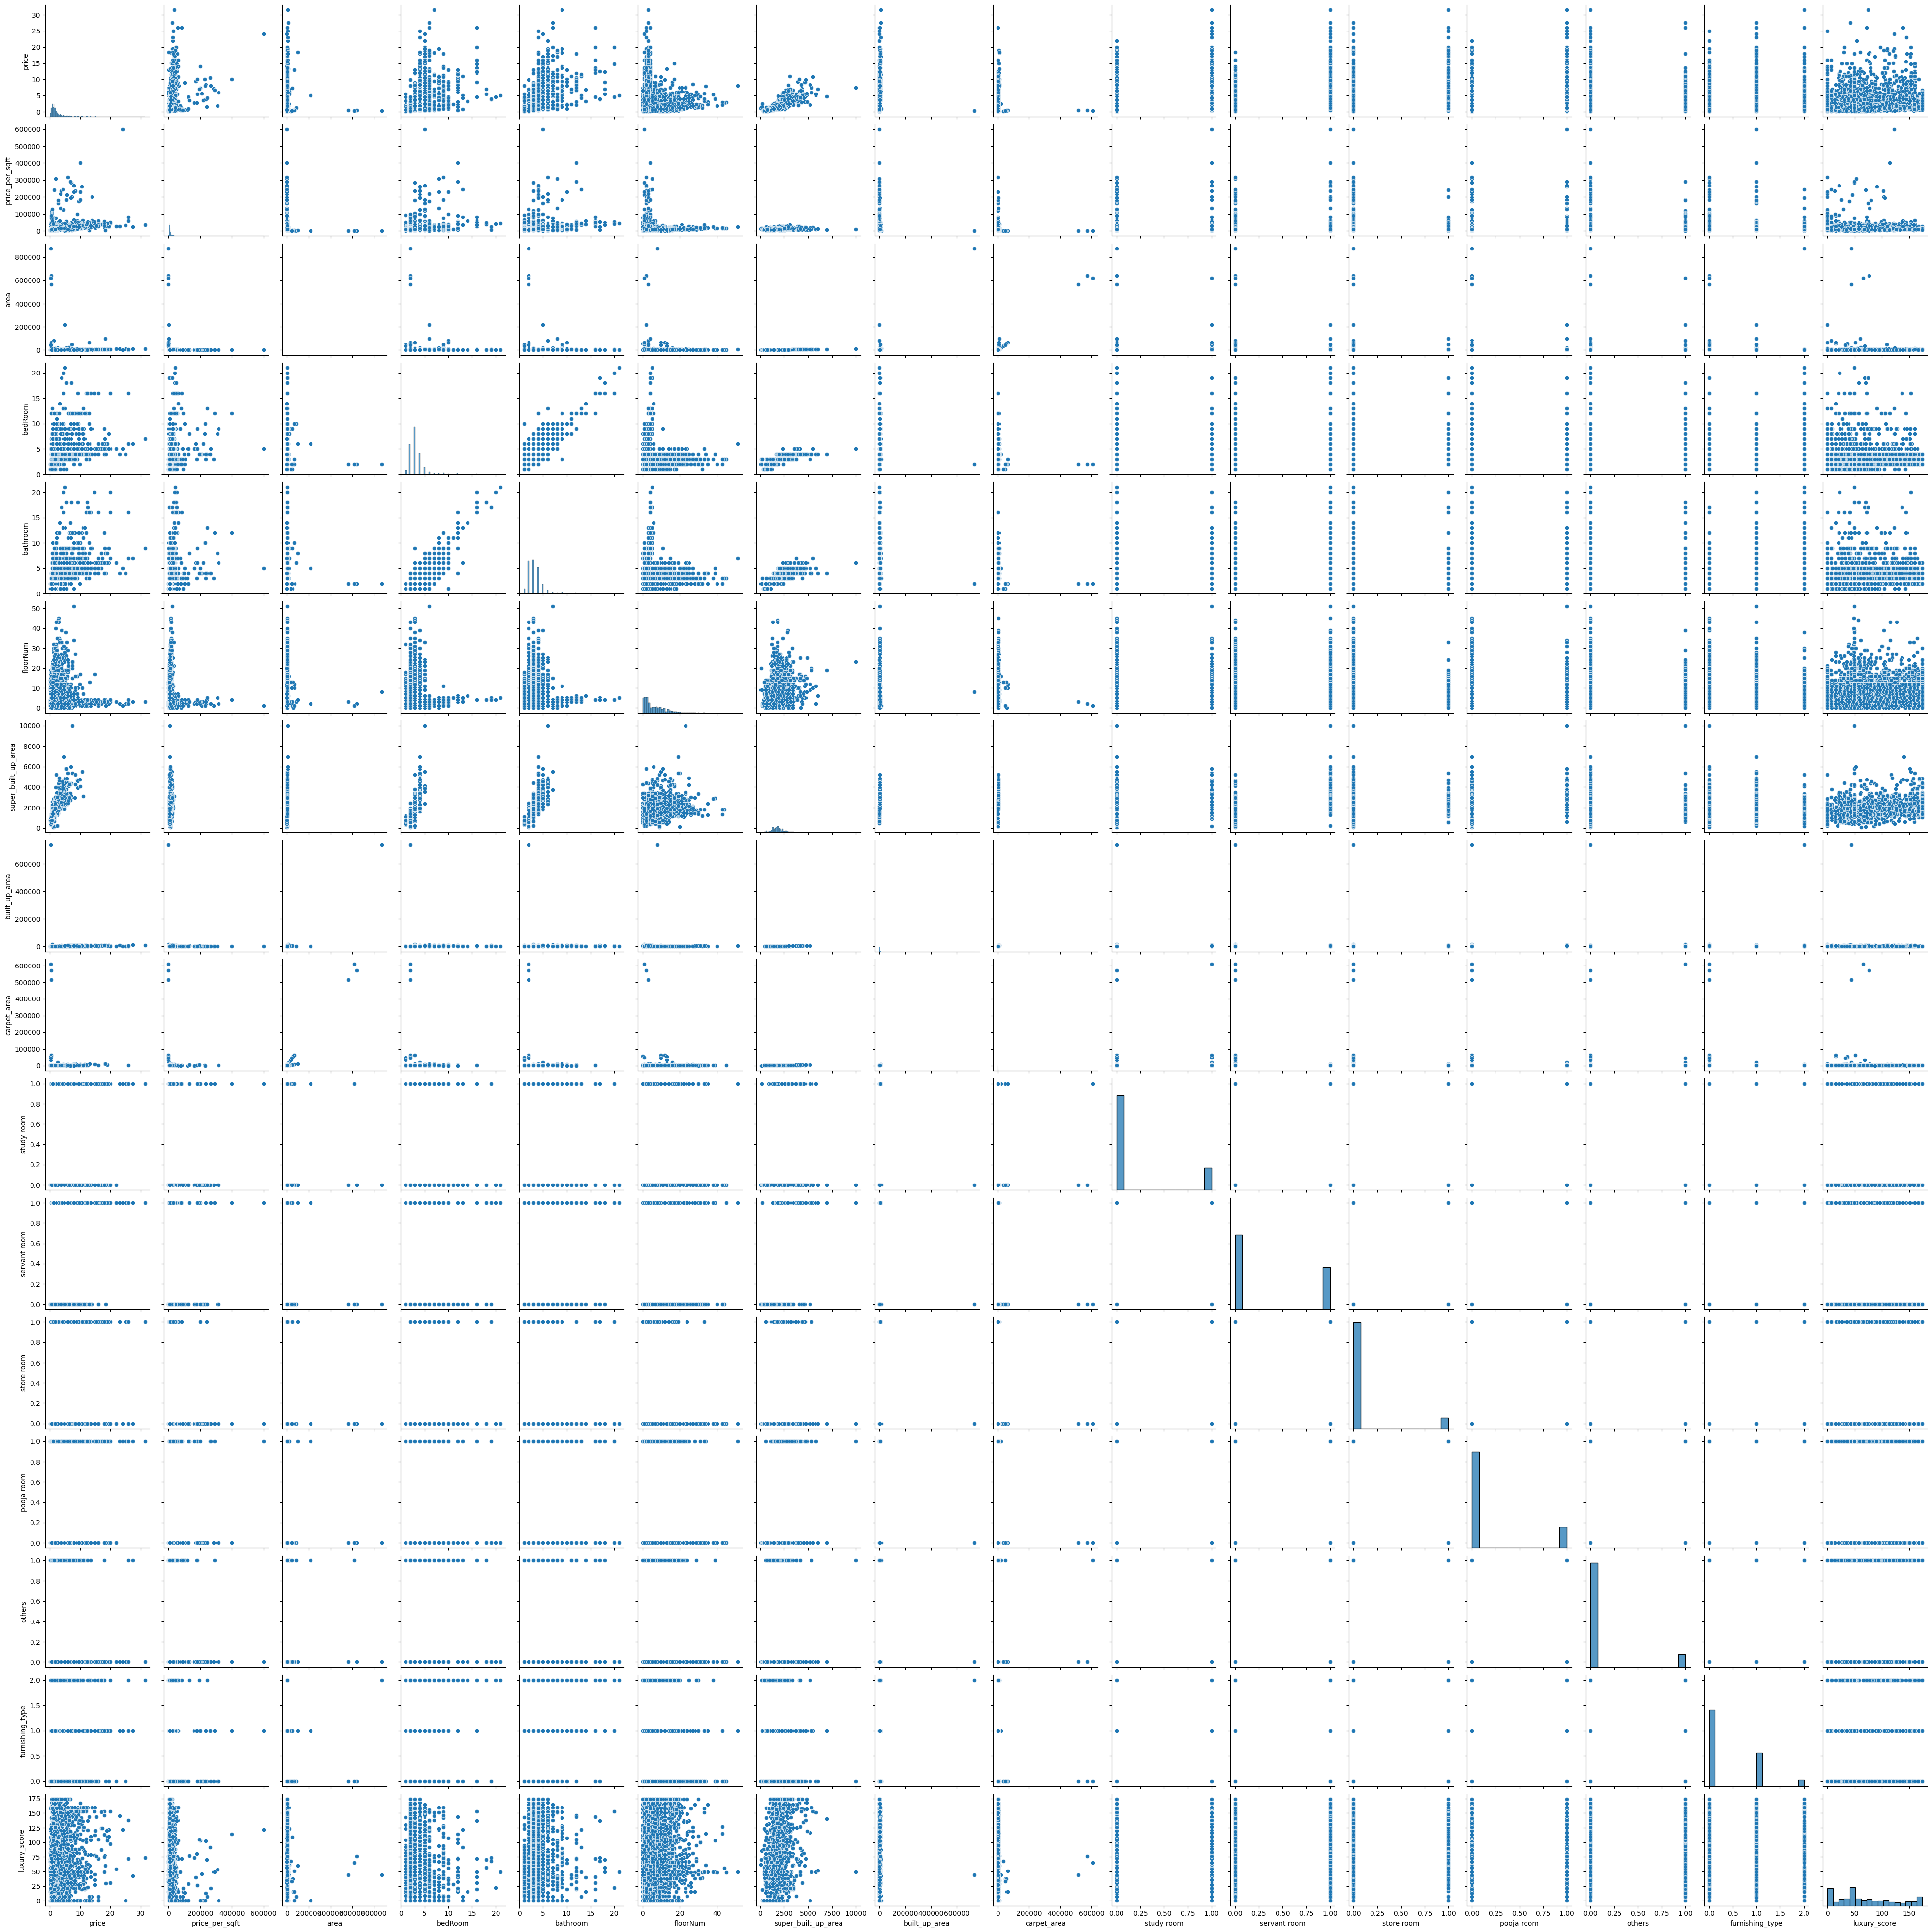

In [157]:
sns.pairplot(df)
plt.show()